# Demo of Ch3. Non-Linear Classifier
----
This is the sample code of TU-ETP-AD1062 Machine Learning Fundamentals.

For more information, please refer to:
https://sites.google.com/view/tu-ad1062-mlfundamentals/

Notice: For the decision tree visualization, please install graphviz via the following command in Anaconda prompt:
`conda install python-graphviz`

In [5]:
# !pip3 install numpy
import numpy as np

# !pip3 install sklearn
import sklearn.datasets
import sklearn.model_selection
import sklearn.metrics
import sklearn.svm
import sklearn.neural_network
import sklearn.tree
import sklearn.ensemble


# !pip3 install matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from mlfund.dataset import Gaussian
from mlfund.dataset import GaussianParam
from mlfund.plot import Plot2D

# !pip3 install graphviz
import graphviz

from sklearn.datasets import load_iris

%matplotlib inline

## Demo 1. Generate random dataset in 2-Dimension
----
The demo here generate two groups of 2-dimension data which are normally distributed as following:
1. Generate 800 training data `X_train`, with corresponded label `y_train`
2. Generate 800 testing data `X_test`, with corresponded label `y_test`

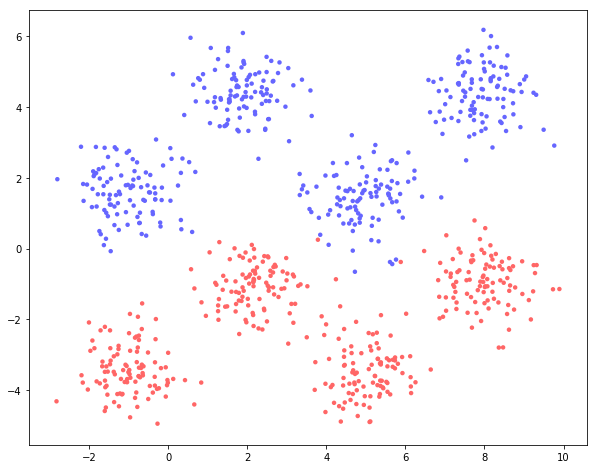

In [6]:
# Generate Training data and plot it
np.random.seed(0)

params_train = []

param = GaussianParam()
param.mean = [-1, 1.5]
param.cov = [[0.5, 0], [0, 0.5]]
param.N = 100
params_train.append(param)

param = GaussianParam()
param.mean = [2, 4.5]
param.cov = [[0.5, 0], [0, 0.5]]
param.N = 100
params_train.append(param)

param = GaussianParam()
param.mean = [5, 1.5]
param.cov = [[0.5, 0], [0, 0.5]]
param.N = 100
params_train.append(param)

param = GaussianParam()
param.mean = [8, 4.5]
param.cov = [[0.5, 0], [0, 0.5]]
param.N = 100
params_train.append(param)


param = GaussianParam()
param.mean = [-1, -3.5]
param.cov = [[0.5, 0], [0, 0.5]]
param.N = 100
params_train.append(param)

param = GaussianParam()
param.mean = [2, -1]
param.cov = [[0.5, 0], [0, 0.5]]
param.N = 100
params_train.append(param)

param = GaussianParam()
param.mean = [5, -3.5]
param.cov = [[0.5, 0], [0, 0.5]]
param.N = 100
params_train.append(param)

param = GaussianParam()
param.mean = [8, -1]
param.cov = [[0.5, 0], [0, 0.5]]
param.N = 100
params_train.append(param)


X_train, y_train = Gaussian.generate(params_train)
y_train[0:400] = 1
y_train[400:800] = 2

plot = Plot2D()
plot.scatter(X_train, y_train)
plot.show()


# Generate testing data
X_test, y_test = Gaussian.generate(params_train)
y_test[0:400] = 1
y_test[400:800] = 2

## Demo 2. Multi-Layer Perceptron (MLP)
----
The demo here trains the model by Multi-Layer Perceptron algorithm with `X_train`, then predict the testing data by `X_test`

Training data:


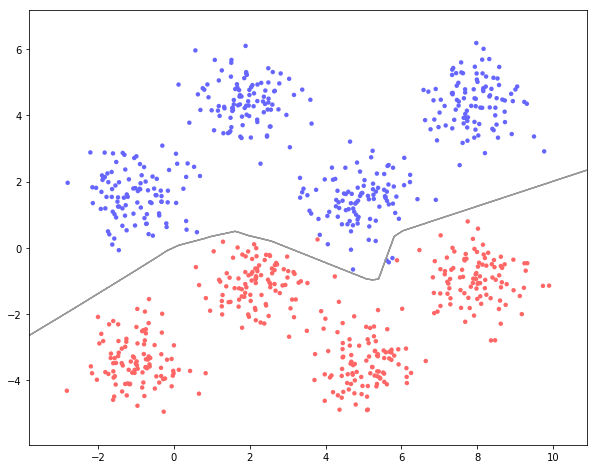

Testing data:
MCE = 0.006


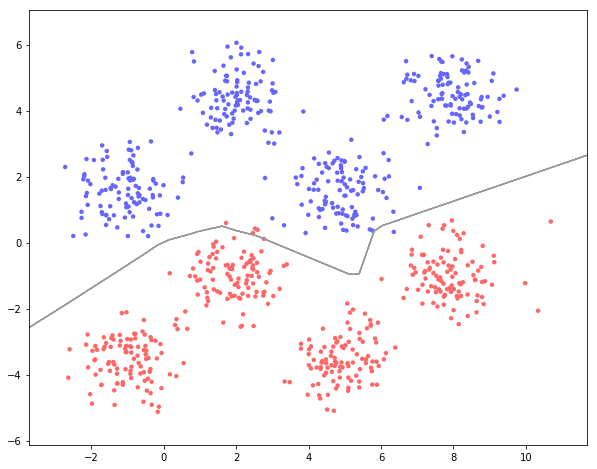

In [7]:
clfMLP = sklearn.neural_network.MLPClassifier(
    hidden_layer_sizes=(10,10,4),
    max_iter=1000,
    tol=1e-10
)
clfMLP.fit(X_train, y_train)

y_test_predict = clfMLP.predict(X_test)

print("Training data:")
plot = Plot2D()
plot.scatter(X_train, y_train)
plot.classifierContour(X_train, y_train, clfMLP)
plot.show()

print("Testing data:")
print("MCE = %2.3f" % sklearn.metrics.zero_one_loss(y_test, y_test_predict))
plot = Plot2D()
plot.scatter(X_test, y_test)
plot.classifierContour(X_test, y_test, clfMLP)
plot.show()

## Demo 3. c-Support Vector Machine (c-SVC)
----
The demo here trains the model by SVM with `X_train`, then predict the testing data by `X_test`
Notice that:
1. The number of support vectors is output via the attribute of `clfSVC.support_vectors_`
2. The support vectors are drawn via the wrapped function `mlfund.scatterSV`

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training data:
#SV = 67


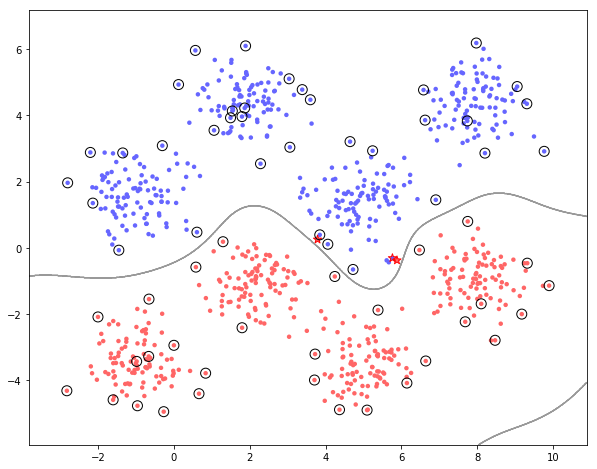

Testing data:
MCE = 0.002


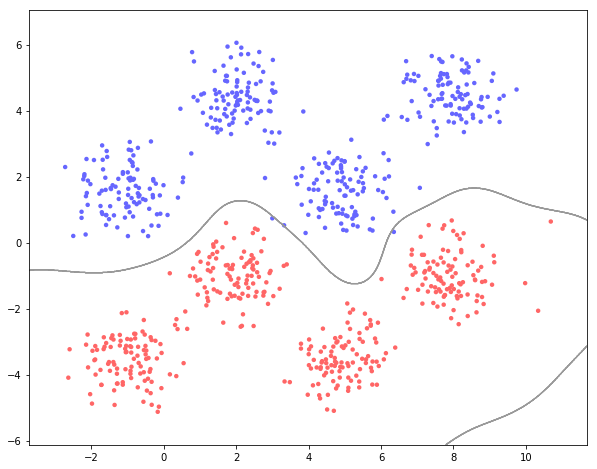

In [11]:
clfSVC = sklearn.svm.SVC(C=10, kernel='rbf')
clfSVC.fit(X_train, y_train)

y_test_predict = clfSVC.predict(X_test)

print("Training data:")
print("#SV = %d" % len(clfSVC.support_vectors_))
plot = Plot2D()
plot.scatter(X_train, y_train)
plot.scatterCSVC(clfSVC)
plot.classifierContour(X_train, y_train, clfSVC)
plot.show()

print("Testing data:")
print("MCE = %2.3f" % sklearn.metrics.zero_one_loss(y_test, y_test_predict))
plot = Plot2D()
plot.scatter(X_test, y_test)
plot.classifierContour(X_test, y_test, clfSVC)
plot.show()

## Demo 4. Decision Tree Classifier
----
The demo here use the IRIS dataset to demonstrate the construction of decision tree

Reference: http://scikit-learn.org/stable/modules/tree.html#classification

In [18]:
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

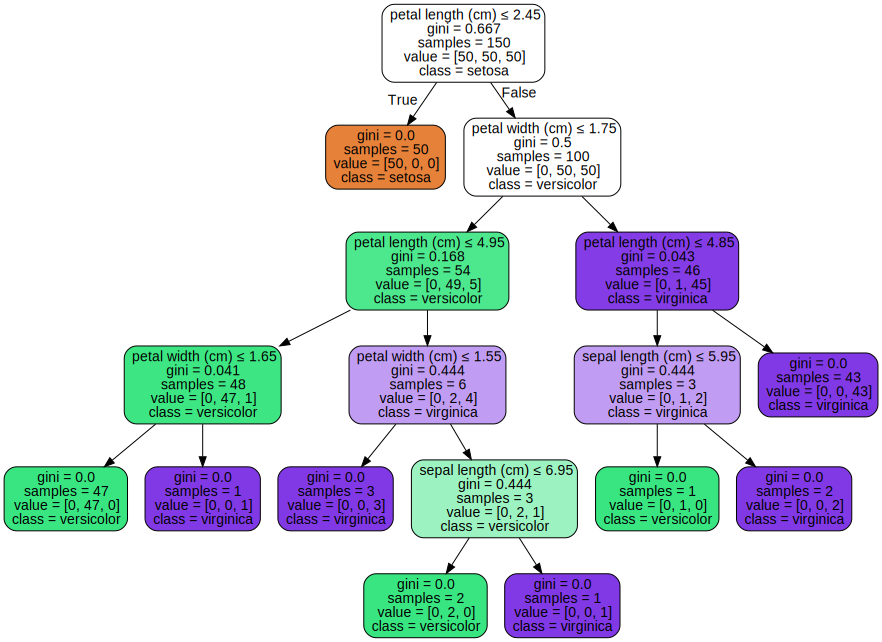

In [21]:
# !apt-get install graphviz
# !brew install graphviz
iris = load_iris()
clfDT = sklearn.tree.DecisionTreeClassifier()
clfDT = clfDT.fit(iris.data, iris.target)

dot_data = sklearn.tree.export_graphviz(
    clfDT,
    out_file=None,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    special_characters=True)
graph = graphviz.Source(dot_data)  
graph

## Demo 5. Gradient Boost Classifier
----
The demo here trains the model by Gradient Boost with `X_train`, then predict the testing data by `X_test`

Training data:


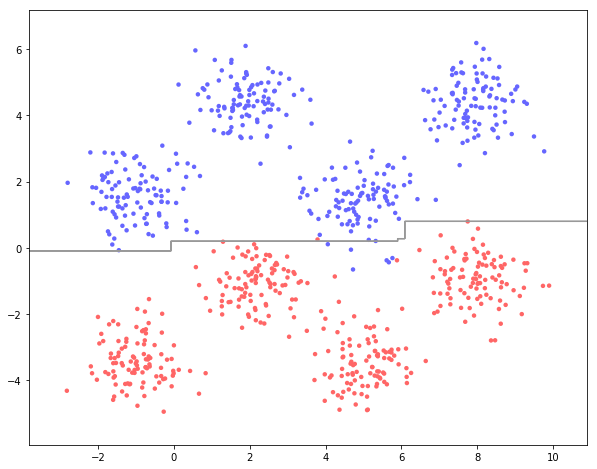

Testing data:
MCE = 0.006


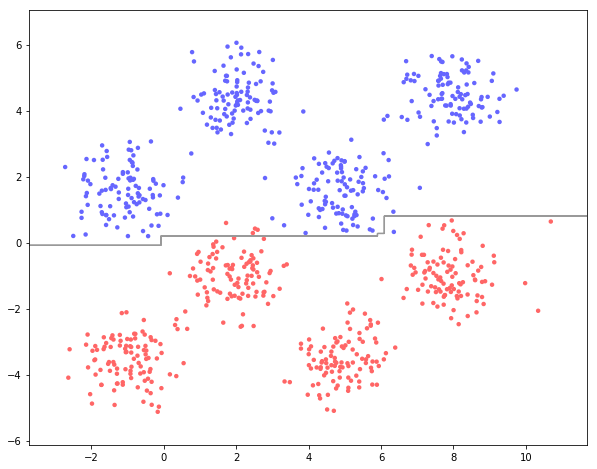

In [19]:
clfGBDT = sklearn.ensemble.GradientBoostingClassifier(max_depth=3, n_estimators=5)
clfGBDT = clfGBDT.fit(X_train, y_train)

y_test_predict = clfGBDT.predict(X_test)

print("Training data:")
plot = Plot2D()
plot.scatter(X_train, y_train)
plot.scatterCSVC(clfGBDT)
plot.classifierContour(X_train, y_train, clfGBDT)
plot.show()

print("Testing data:")
print("MCE = %2.3f" % sklearn.metrics.zero_one_loss(y_test, y_test_predict))
plot = Plot2D()
plot.scatter(X_test, y_test)
plot.classifierContour(X_test, y_test, clfGBDT)
plot.show()